In [1]:
library(ggplot2)
library(tidyverse)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 4.1.2"
Warning message:
"package 'tidyverse' was built under R version 4.1.2"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
energy_data<-read.csv("energydata_complete.csv")
energy_data$date <- strptime(as.character(energy_data$date),format="%Y-%m-%d %H:%M:%S") 
energy_data$date <- as.POSIXct(energy_data$date,tz = "UTC") 

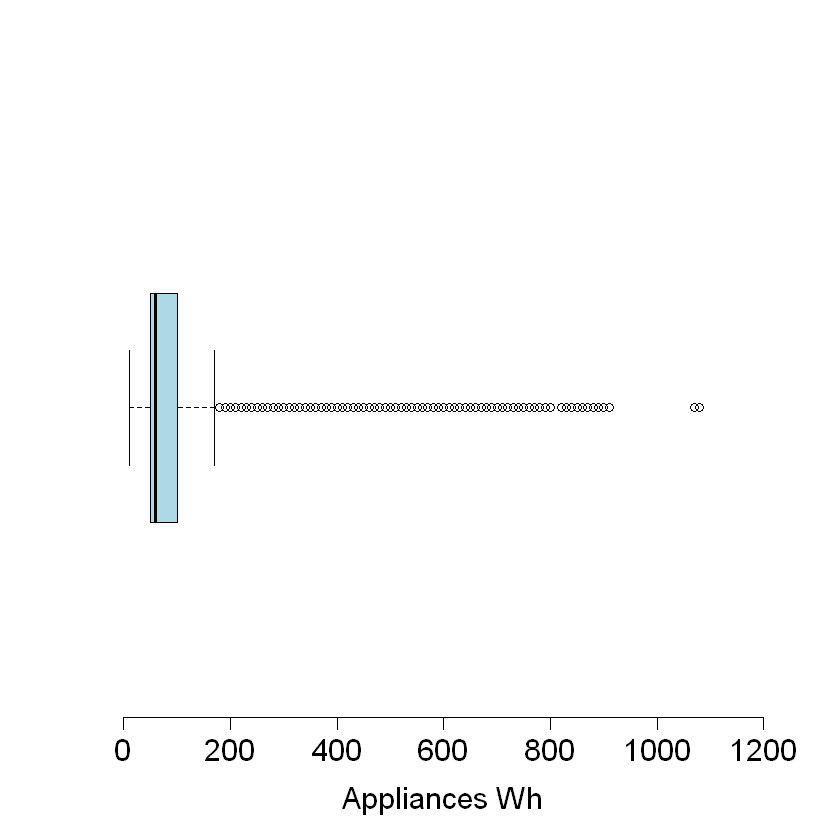

In [4]:
boxplot(energy_data$Appliances,
        boxfill = "lightblue",horizontal=TRUE,ylim=c(0,1200),xlab="Appliances Wh",frame=F,
        cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

In [7]:
library(corrplot)  
library(psych)
library(lubridate)

corrplot 0.90 loaded

Warning message:
"package 'psych' was built under R version 4.1.2"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [8]:
weekend_weekday <- function(x) {
  val <- weekdays(x)
  if (val == "Saturday" | val == "Sunday") {
    val2 = "Weekend"
  }
  else {
    val2= "Weekday"
  }
  return(val2)
}


second_day <- function(x) {
  # x is an object in posixct format
  s <- hour(x)*3600+minute(x)*60+second(x)
  
}


In [9]:
energy_data$NSM <- second_day(energy_data$date)

energy_data$WeekStatus <- unlist(lapply(energy_data$date,weekend_weekday))

energy_data$Day_of_week <-weekdays(energy_data$date)

unique(energy_data$WeekStatus)

unique(energy_data$Day_of_week)

energy_data$Day_of_week <-as.factor(energy_data$Day_of_week)

energy_data$WeekStatus <- as.factor(energy_data$WeekStatus)

[1] "Weekday" "Weekend"

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




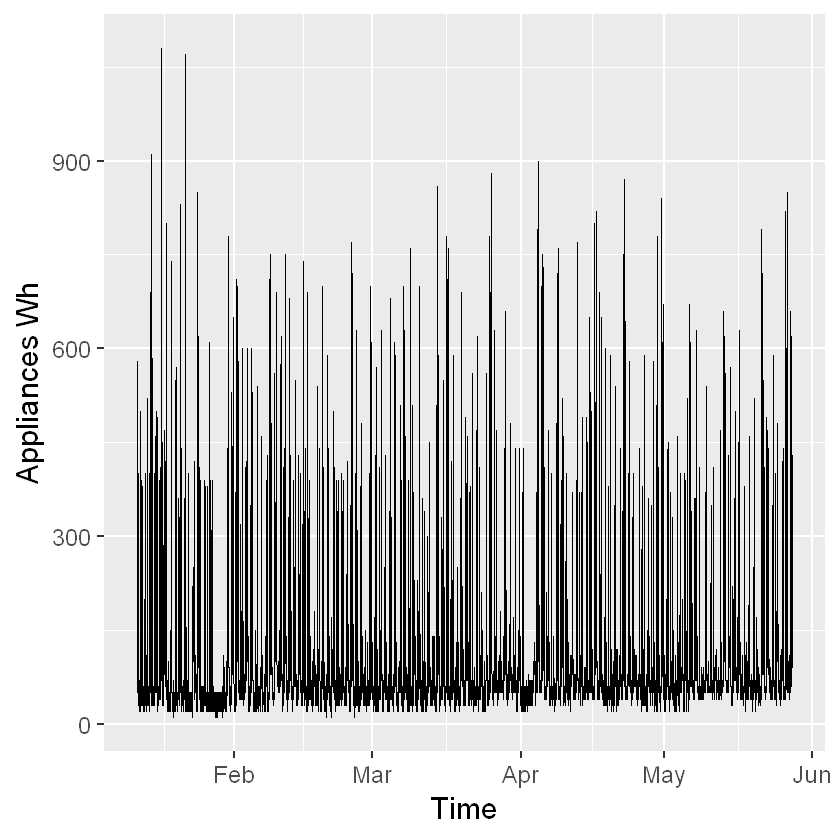

In [10]:
require(gridExtra)

plot1 <-qplot(energy_data$date,energy_data$Appliances,xlab='Time',ylab='Appliances Wh',geom="line")+theme_grey(base_size = 18) 
plot1

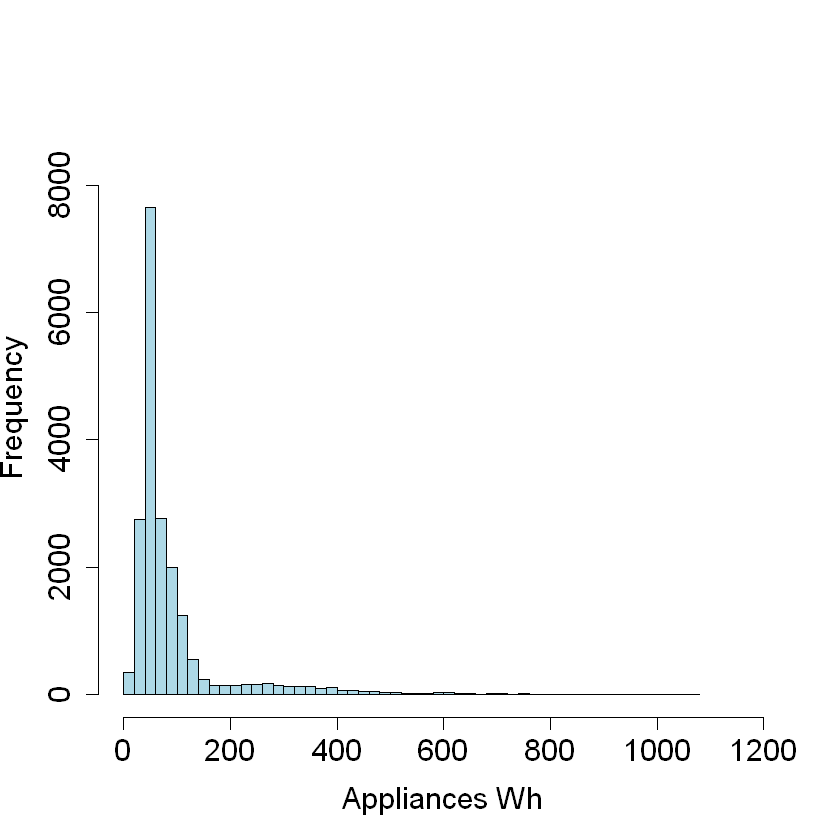

In [11]:
hist(energy_data$Appliances,main="",xlab = "Appliances Wh",breaks = 40,
     col='lightblue',xlim=c(0,1200),ylim=c(0,9000),cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

In [12]:
energy_data$my <- floor_date(energy_data$date,"month")


energy_data$mhr <- floor_date(energy_data$date,"hour")

library(plyr)
energy_data_Total_per_hour <-  ddply(energy_data, "mhr", summarise,
                                     Appliances=sum(Appliances))

energy_data_Total_per_hour

energy_data_Total_per_hour$Day_week <- wday(energy_data_Total_per_hour$mhr,label=TRUE)


Warning message:
"package 'plyr' was built under R version 4.1.2"
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:purrr':

    compact




mhr,Appliances
<dttm>,<int>
2016-01-11 17:00:00,330
2016-01-11 18:00:00,1060
2016-01-11 19:00:00,1040
2016-01-11 20:00:00,750
2016-01-11 21:00:00,620
2016-01-11 22:00:00,1600
2016-01-11 23:00:00,340
2016-01-12 00:00:00,850
2016-01-12 01:00:00,1010


In [13]:
energy_data_Total_per_hour_na_removed <- na.omit(energy_data_Total_per_hour)